# Explore here

In [35]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# load the .env file variables
load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

auth_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

artist = 'spotify:artist:0PCCGZ0wGLizHt2KZ7hhA2'

results = sp.artist_top_tracks(artist, country='US')
#print(response)


if results:
  tracks = results["tracks"]
  #{k: v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]}
  tracks = [
    {key: (value/(1000*60)) if key == "duration_ms" else value for key, value in track.items() if key in ["name", "popularity", "duration_ms"]} for track in tracks
    ]
  
print(tracks)

[{'duration_ms': 2.3752333333333335, 'name': 'i like the way you kiss me', 'popularity': 82}, {'duration_ms': 2.13675, 'name': "if u think i'm pretty", 'popularity': 79}, {'duration_ms': 2.436933333333333, 'name': 'cross my heart', 'popularity': 73}, {'duration_ms': 3.0224333333333333, 'name': 'dirty little secret', 'popularity': 66}, {'duration_ms': 1.6625, 'name': 'wet dreams', 'popularity': 66}, {'duration_ms': 2.2997666666666667, 'name': 'i like the way you kiss me - southstar remix', 'popularity': 66}, {'duration_ms': 2.10745, 'name': 'how could u love somebody like me?', 'popularity': 62}, {'duration_ms': 2.7067666666666668, 'name': 'i like the way you kiss me - burnt', 'popularity': 62}, {'duration_ms': 1.9850666666666668, 'name': 'prettygrunge.wav', 'popularity': 62}, {'duration_ms': 2.2683166666666668, 'name': 'i always kinda knew you’d be the death of me', 'popularity': 61}]


In [36]:
# Reordering the fields 'name', 'popularity', 'duration_ms'
tracks = [
    {
        'name': track['name'],
        'popularity': track['popularity'],
        'duration_ms': track['duration_ms']
    } for track in tracks
]


In [37]:
import pandas as pd

# Convert the list of dictionaries to a Pandas DataFrame
tracks_df = pd.DataFrame(tracks)

# Sort by popularity in ascending order
tracks_df.sort_values(by= 'popularity', ascending=True)

print(tracks_df.head(3))

                         name  popularity  duration_ms
0  i like the way you kiss me          82     2.375233
1       if u think i'm pretty          79     2.136750
2              cross my heart          73     2.436933


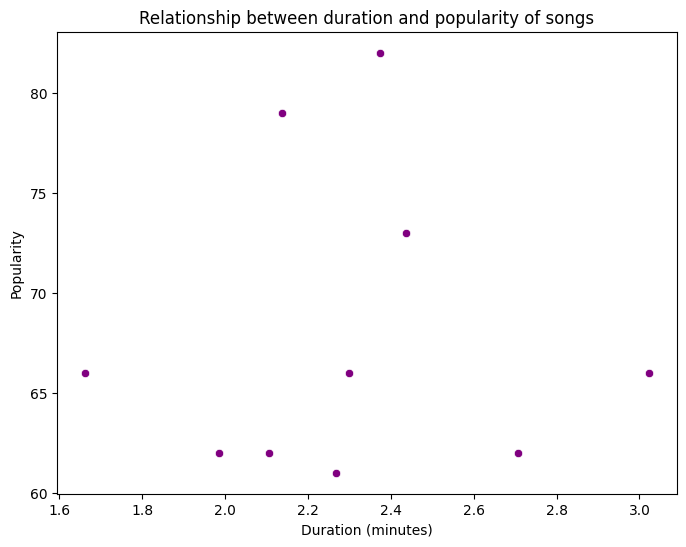

Correlación entre popularidad y duración: 0.02


In [39]:
# Graph scatter plot of duration vs popularity
plt.figure(figsize=(8,6))
sns.scatterplot(data=tracks_df, x='duration_ms', y='popularity', color='purple' )


plt.title('Relationship between duration and popularity of songs')
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')


plt.show()

# Calculate the correlation between duration and popularity
correlation = tracks_df['popularity'].corr(tracks_df['duration_ms'])
print(f"Correlación entre popularidad y duración: {correlation:.2f}")


### Statistical analysis
A correlation value of 0.02 between song duration and popularity indicates that there is no significant linear relationship between the two variables. This means that the length of a song has little to no impact on its popularity.

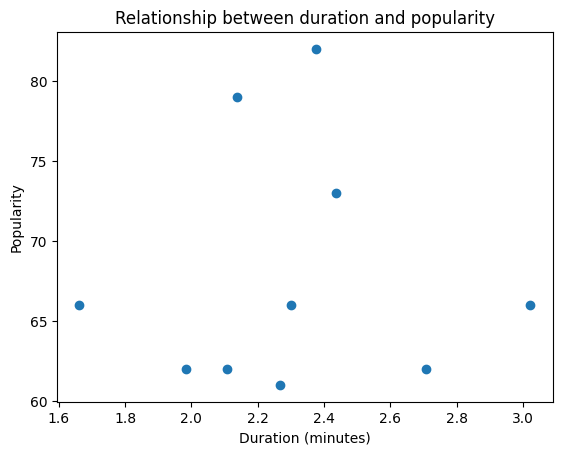

In [38]:
#another way to perform a scatterplot, using only Matplotlib.
x = tracks_df['duration_ms']
y = tracks_df['popularity']


plt.scatter(x, y)

# Definir os rótulos dos eixos e o título
plt.title('Relationship between duration and popularity')
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')


# Mostrar o gráfico
plt.show()
